In [192]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [193]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [194]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df.explode('job_skills')
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


## EDA For USA Data Analyst Job

In [195]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

Text(0, 0.5, '')

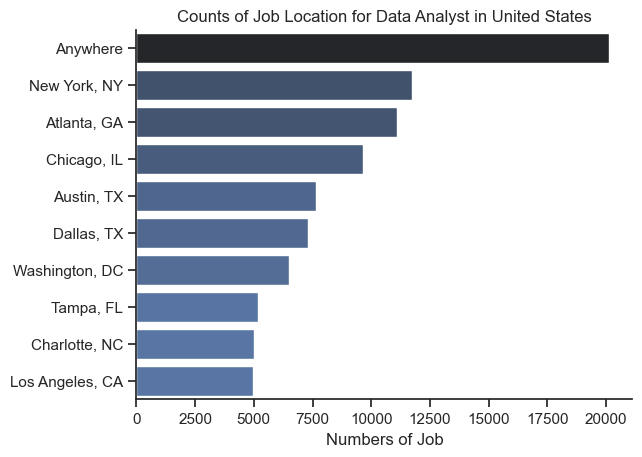

In [196]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analyst in United States')
plt.xlabel('Numbers of Job')
plt.ylabel('')

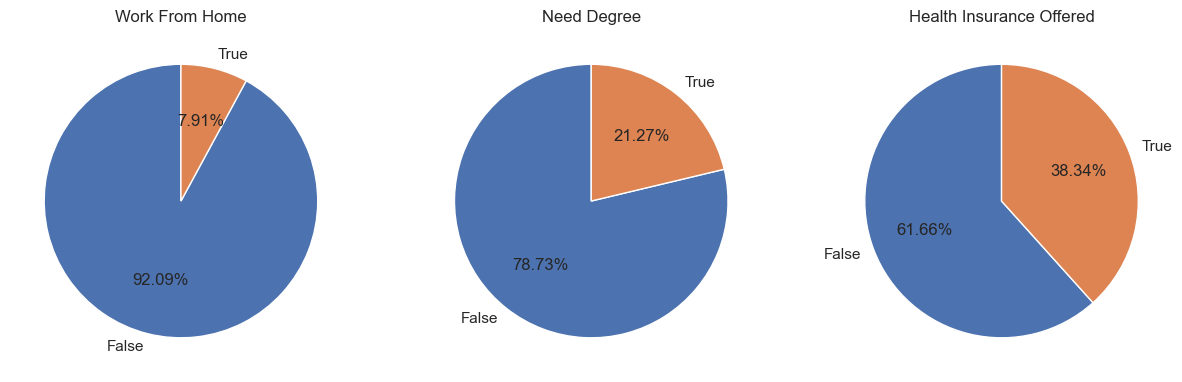

In [197]:
dict_df={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Need Degree',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,10)

for i,(column,title) in enumerate(dict_df.items()):
    df_DA_US[column].value_counts().plot(kind='pie',startangle=90,autopct='%1.2f%%',ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_ylabel('')

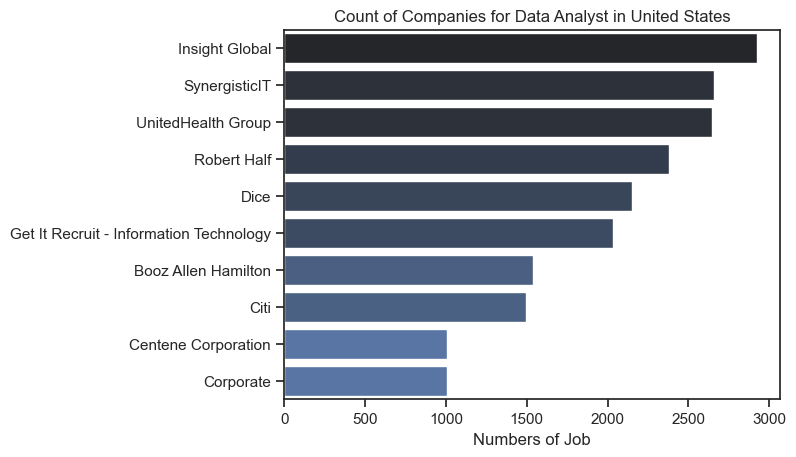

In [198]:
df_company = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_style(style='ticks')
sns.barplot(data=df_company,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.title('Count of Companies for Data Analyst in United States')
plt.ylabel('')
plt.xlabel('Numbers of Job')
plt.show()

## EDA for Philippines Job

In [199]:
df_PH = df[df['job_country'] == 'Philippines'].copy()

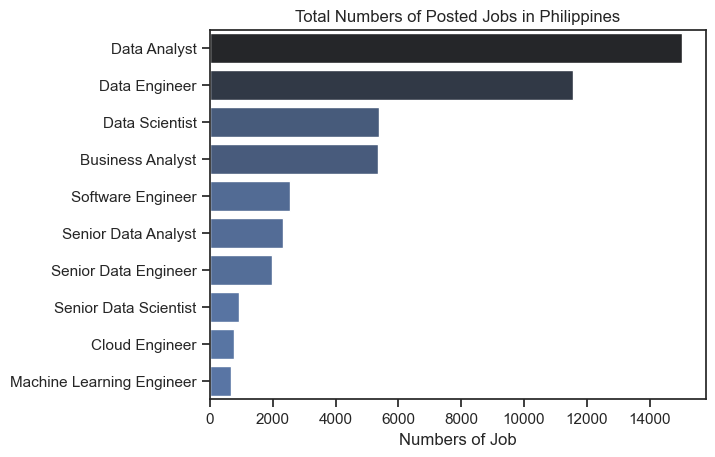

In [200]:
# Show numbers of posted jobs in philippines

df_PH_job = df_PH['job_title_short'].value_counts().to_frame()

sns.barplot(
    data= df_PH_job
    ,x= 'count'
    ,y='job_title_short'
    ,hue='count'
    ,palette= 'dark:b_r'
    ,legend= False
)

plt.title('Total Numbers of Posted Jobs in Philippines')
plt.xlabel('Numbers of Job')
plt.ylabel('')
plt.show()

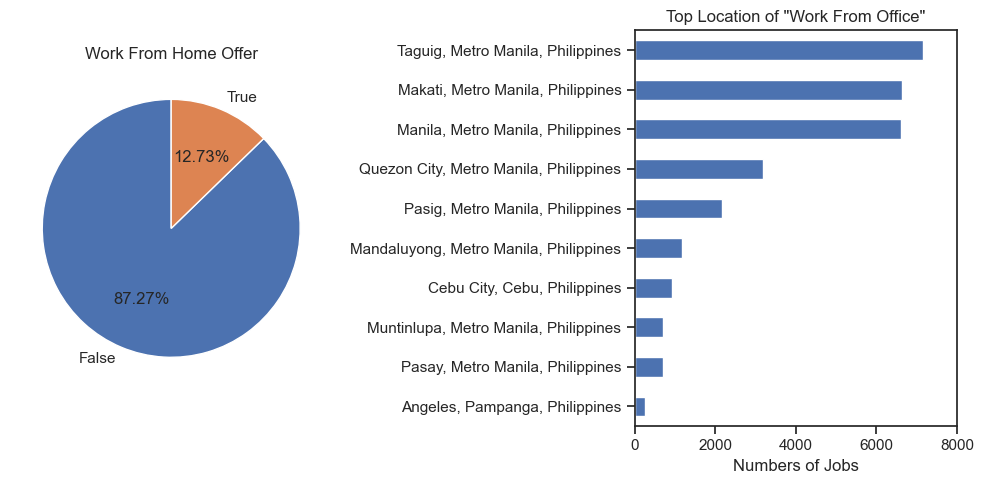

In [201]:
# Show a percentage rate of wfh and the location of top wfo.

df_location = df_PH[df_PH['job_work_from_home'] == False].value_counts(subset='job_location').head(11).sort_values().to_frame()
df_location = df_location.drop(['Philippines'],axis=0)
df_wfh = df_PH['job_work_from_home'].value_counts()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

df_wfh.plot(kind= 'pie',ax= ax[0],startangle= 90,autopct= '%1.2f%%')
ax[0].set_title('Work From Home Offer')
ax[0].set_ylabel('')


df_location.plot(kind='barh',ax= ax[1], legend= False)
ax[1].set_title('Top Location of "Work From Office"')
ax[1].set_ylabel('')
ax[1].set_xlabel('Numbers of Jobs')
ax[1].set_xlim(0,8000)

fig.tight_layout()


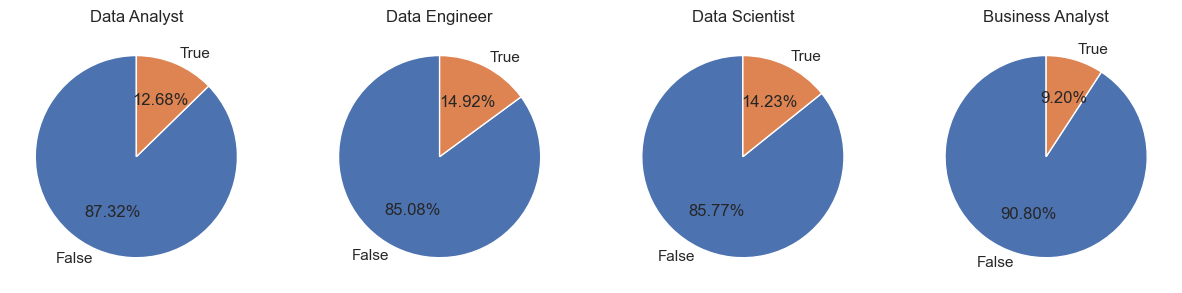

In [202]:
list_top_job = df_PH['job_title_short'].value_counts().head(4).index.to_list()

fig, ax = plt.subplots(1,4)
fig.set_size_inches(15,30)

for i,job in enumerate(list_top_job):
    df_job = df_PH[df_PH['job_title_short'] == job]
    df_job['job_work_from_home'].value_counts().plot(kind='pie',ax= ax[i],startangle= 90,autopct= '%1.2f%%')
    ax[i].set_ylabel('')
    ax[i].set_title(job)

Text(0.5, 0, 'Salary(USD$)')

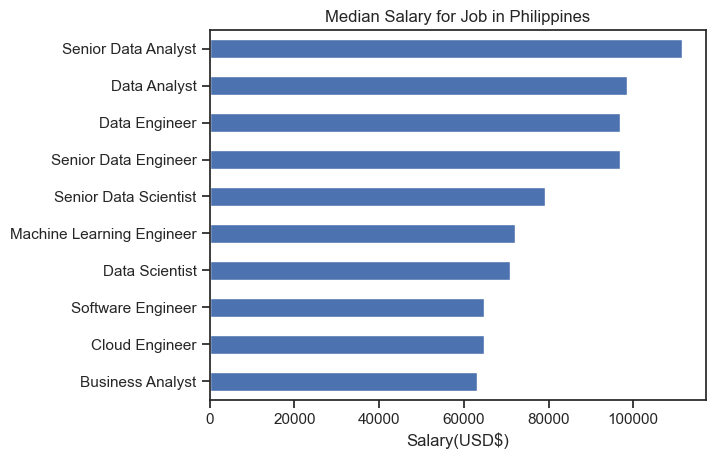

In [222]:
median_salary = df_PH.groupby(['job_title_short']).agg(median_salary = ('salary_year_avg','median')).sort_values(by='median_salary')

median_salary.plot(kind='barh',legend= False)
plt.title('Median Salary for Job in Philippines')
plt.ylabel('')
plt.xlabel('Salary(USD$)')